EDA

Cargar el conjunto de datos:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
parameter_df = pd.read_csv("Parameter_index.csv")
queens_air_quality_df = pd.read_csv("Queens_air_quality.csv")

Revisamos la informacion de los mismos:

In [8]:
print(parameter_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   parameter_code  4 non-null      int64 
 1   parameter       4 non-null      object
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes
None


In [9]:
print(queens_air_quality_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4377 entries, 0 to 4376
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_aq               4377 non-null   int64  
 1   parameter_code      4377 non-null   int64  
 2   sample_measurement  4377 non-null   float64
 3   latitude            4377 non-null   float64
 4   longitude           4377 non-null   float64
 5   year                4377 non-null   int64  
 6   month               4377 non-null   int64  
 7   day                 4377 non-null   int64  
 8   hour                4377 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 307.9 KB
None


Combinamos los datasdets con la columna en común "parameter_code" y agregamos una columna "Parameter" en el dataset Queens_air_quality.csv con el valor de ese parámetro:

In [12]:
import pandas as pd

# Cargar el dataset Queens_air_quality.csv
queens_air_quality_df = pd.read_csv("Queens_air_quality.csv")

# Cargar el dataset Parameter_index.csv
parameter_df = pd.read_csv("Parameter_index.csv")

# Combinar los datasets en función de 'parameter_code' y agregar la columna 'Parameter'
combined_df = queens_air_quality_df.merge(parameter_df[['parameter_code', 'parameter']], on='parameter_code')

# Visualizar las primeras filas del dataset combinado
print(combined_df.head())


   ID_aq  parameter_code  sample_measurement   latitude  longitude  year  \
0      0           88502                12.8  40.739264 -73.817694  2021   
1      1           88502                10.2  40.739264 -73.817694  2021   
2      2           88502                10.0  40.739264 -73.817694  2021   
3      3           88502                 7.7  40.739264 -73.817694  2021   
4      4           88502                 3.8  40.739264 -73.817694  2021   

   month  day  hour                               parameter  
0      3    4     6  Acceptable PM2.5 AQI & Speciation Mass  
1      3    4     7  Acceptable PM2.5 AQI & Speciation Mass  
2      3    4     8  Acceptable PM2.5 AQI & Speciation Mass  
3      3    4     9  Acceptable PM2.5 AQI & Speciation Mass  
4      3    4    10  Acceptable PM2.5 AQI & Speciation Mass  


Información general sobre el nuevo conjunto de datos:

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Visualizar la información del dataframe
print(combined_df.info())

# Mostrar las columnas del dataframe
print(combined_df.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4377 entries, 0 to 4376
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_aq               4377 non-null   int64  
 1   parameter_code      4377 non-null   int64  
 2   sample_measurement  4377 non-null   float64
 3   latitude            4377 non-null   float64
 4   longitude           4377 non-null   float64
 5   year                4377 non-null   int64  
 6   month               4377 non-null   int64  
 7   day                 4377 non-null   int64  
 8   hour                4377 non-null   int64  
 9   parameter           4377 non-null   object 
dtypes: float64(3), int64(6), object(1)
memory usage: 342.1+ KB
None
Index(['ID_aq', 'parameter_code', 'sample_measurement', 'latitude',
       'longitude', 'year', 'month', 'day', 'hour', 'parameter'],
      dtype='object')


Este DataFrame contiene información sobre calidad del aire en la ciudad de Nueva york con 4377 entradas y 10 columnas. 
Los tipos de datos predominantes son objetos float64(3), int64(6), object(1).


In [32]:
combined_df.head(5)

,ID_aq,parameter_code,sample_measurement,latitude,longitude,year,month,day,hour,parameter
0,0,88502,12.8,40.739264,-73.817694,2021,3,4,6,Acceptable PM2.5 AQI & Speciation Mass
1,1,88502,10.2,40.739264,-73.817694,2021,3,4,7,Acceptable PM2.5 AQI & Speciation Mass
2,2,88502,10.0,40.739264,-73.817694,2021,3,4,8,Acceptable PM2.5 AQI & Speciation Mass
3,3,88502,7.7,40.739264,-73.817694,2021,3,4,9,Acceptable PM2.5 AQI & Speciation Mass
4,4,88502,3.8,40.739264,-73.817694,2021,3,4,10,Acceptable PM2.5 AQI & Speciation Mass


Verificar si hay valores nulos:

In [14]:
null_values = combined_df.isnull().sum()

# Mostrar la cantidad de valores nulos por columna
print(null_values)


ID_aq                 0
parameter_code        0
sample_measurement    0
latitude              0
longitude             0
year                  0
month                 0
day                   0
hour                  0
parameter             0
dtype: int64


No se encuentran valores nulos en ninguna de las columnas, lo que indica que el DataFrame está limpio en términos de datos faltantes.

Resumen estadístico del conjunto de datos:

In [18]:
print(combined_df.describe())

             ID_aq  parameter_code  sample_measurement     latitude  \
count  4377.000000     4377.000000         4377.000000  4377.000000   
mean   2188.000000    55381.693626            6.483165    40.736245   
std    1263.675393    20767.897429            8.037647     0.003932   
min       0.000000    42101.000000           -5.100000    40.726980   
25%    1094.000000    42101.000000            0.289000    40.736140   
50%    2188.000000    42602.000000            4.200000    40.736140   
75%    3282.000000    88502.000000            9.900000    40.739264   
max    4376.000000    88502.000000           51.100000    40.739264   

         longitude         year        month          day         hour  
count  4377.000000  4377.000000  4377.000000  4377.000000  4377.000000  
mean    -73.829523  2021.497830     7.890793    12.615719    12.993831  
std       0.025148     0.500052     3.693149     7.724070     4.361227  
min     -73.893130  2021.000000     3.000000     4.000000     6.0000

Distribución de los parámetros por año:

<Figure size 1200x600 with 0 Axes>

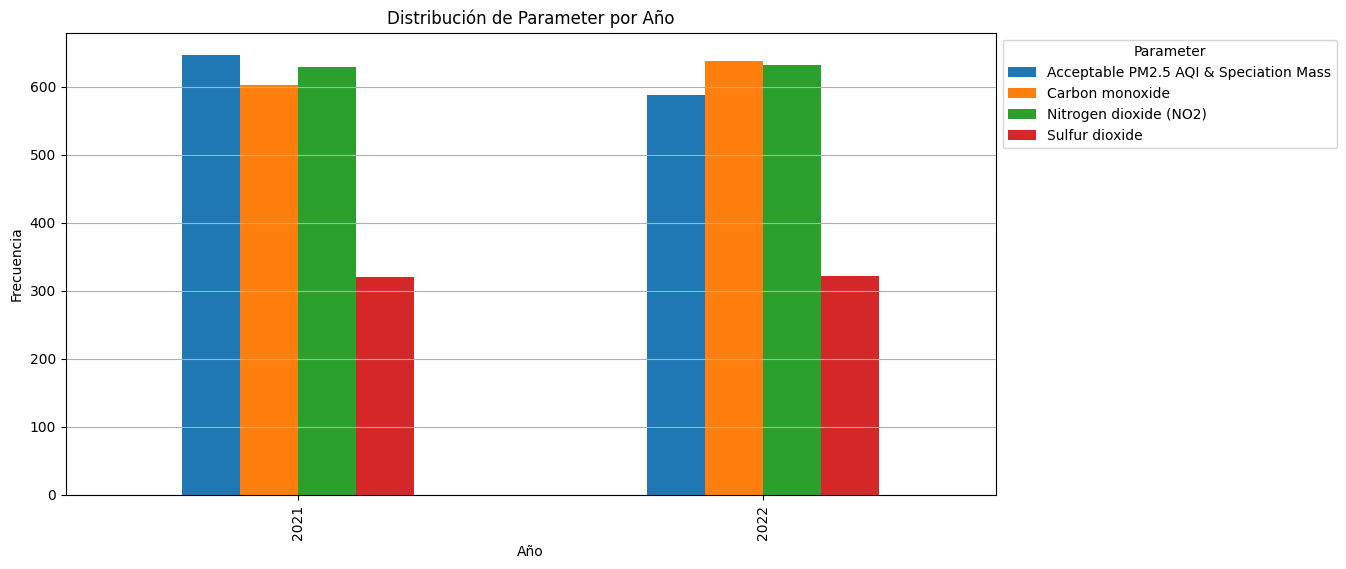

In [24]:
import matplotlib.pyplot as plt

# Crear un histograma de barras agrupadas
plt.figure(figsize=(12, 6))

# Agrupar los valores de parameter por año
parameter_counts = combined_df.groupby(['year', 'parameter']).size().unstack()

# Crear un gráfico de barras agrupadas
parameter_counts.plot(kind='bar', stacked=False, figsize=(12, 6))

plt.title('Distribución de Parameter por Año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.legend(title='Parameter', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()


Tendencia General: Los valores muestran una ligera disminución en las medidas aceptables en 2022 en comparación con 2021. Esto podría sugerir una mejora en la calidad del aire en general, aunque las diferencias son relativamente pequeñas.

Monóxido de Carbono (CO): El aumento en las medidas de monóxido de carbono en 2022 en comparación con 2021 podría ser motivo de preocupación. Aunque no es una diferencia significativa, un aumento en las concentraciones de CO podría estar relacionado con la contaminación del aire debido al tráfico u otras fuentes de emisiones de CO.

Dióxido de Nitrógeno (NO2): Al igual que con el CO, el aumento en las medidas de dióxido de nitrógeno en 2022 podría ser indicativo de una mayor contaminación del aire. El NO2 se asocia comúnmente con las emisiones del tráfico y la industria.

Dióxido de Azufre (SO2): Aunque los valores se mantienen constantes entre 2021 y 2022, el SO2 es un contaminante del aire que puede estar relacionado con la quema de combustibles fósiles y la industria. La estabilidad en las medidas podría indicar un control efectivo de las fuentes de emisiones.

Análisis de Factores Externos: Para comprender mejor estas tendencias, sería útil considerar factores externos como regulaciones ambientales, cambios en el tráfico, eventos climáticos y la pandemia de COVID-19 (que tuvo un impacto en la movilidad y la actividad industrial)

c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categoric

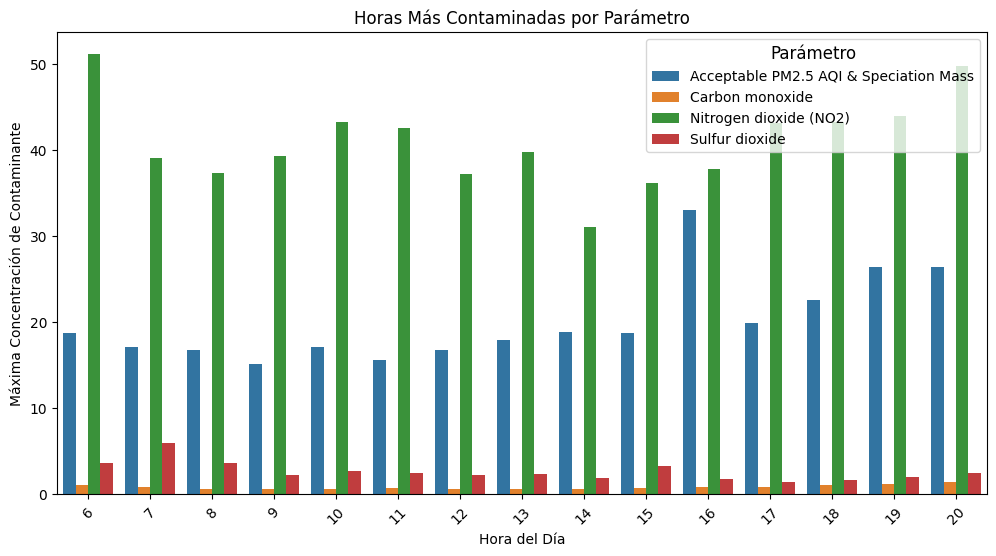

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los valores máximos de sample_measurement por parámetro y hora
max_values_by_parameter_hour = combined_df.groupby(['parameter', 'hour'])['sample_measurement'].max().reset_index()

# Ordenar los valores máximos en orden descendente para cada parámetro
max_values_by_parameter_hour = max_values_by_parameter_hour.sort_values(by=['parameter', 'sample_measurement'], ascending=[True, False])

# Crear un gráfico de barras para mostrar las horas más contaminadas por parámetros
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='sample_measurement', hue='parameter', data=max_values_by_parameter_hour)
plt.title('Horas Más Contaminadas por Parámetro')
plt.xlabel('Hora del Día')
plt.ylabel('Máxima Concentración de Contaminante')
plt.legend(title='Parámetro', title_fontsize='12', loc='upper right')
plt.xticks(rotation=45)

plt.show()


c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categoric

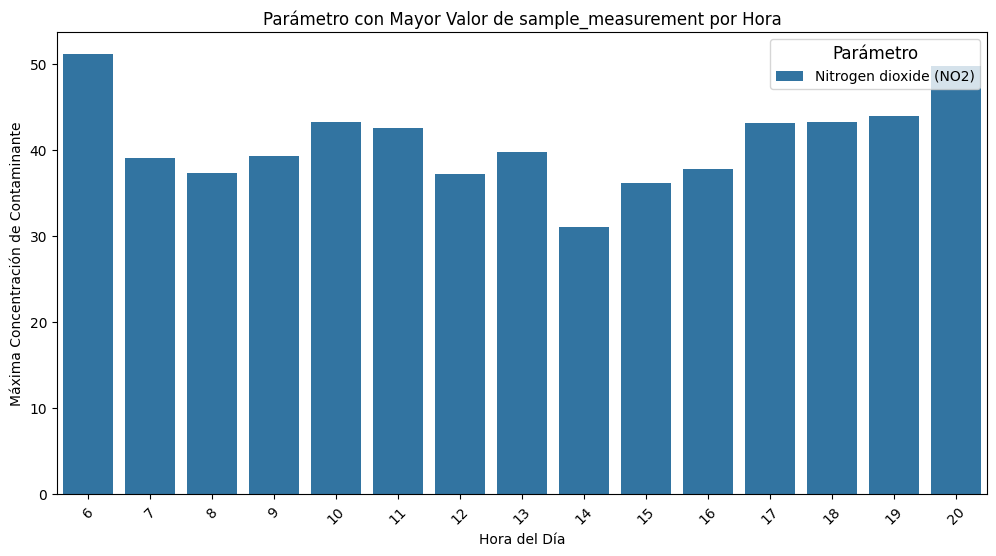

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar el valor máximo de sample_measurement por hora y parámetro
max_value_by_hour_parameter = combined_df.groupby(['hour', 'parameter'])['sample_measurement'].max().reset_index()

# Encontrar el parámetro con el mayor valor para cada hora
max_value_by_hour_parameter = max_value_by_hour_parameter.loc[max_value_by_hour_parameter.groupby('hour')['sample_measurement'].idxmax()]

# Crear un gráfico de barras para mostrar el parámetro con el mayor valor de sample_measurement por hora
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='sample_measurement', hue='parameter', data=max_value_by_hour_parameter)
plt.title('Parámetro con Mayor Valor de sample_measurement por Hora')
plt.xlabel('Hora del Día')
plt.ylabel('Máxima Concentración de Contaminante')
plt.legend(title='Parámetro', title_fontsize='12', loc='upper right')
plt.xticks(rotation=45)

plt.show()


In [39]:
# Filtrar el valor máximo de sample_measurement por hora y parámetro
max_value_by_hour_parameter = combined_df.groupby(['hour', 'parameter'])['sample_measurement'].max().reset_index()

# Encontrar el parámetro con el mayor valor para cada hora
max_value_by_hour_parameter = max_value_by_hour_parameter.loc[max_value_by_hour_parameter.groupby('hour')['sample_measurement'].idxmax()]

# Ordenar la tabla por el mayor valor en sample_measurement
max_value_by_hour_parameter = max_value_by_hour_parameter.sort_values(by='sample_measurement', ascending=False)

# Mostrar la tabla ordenada
print(max_value_by_hour_parameter)


    hour               parameter  sample_measurement
2      6  Nitrogen dioxide (NO2)                51.1
58    20  Nitrogen dioxide (NO2)                49.7
54    19  Nitrogen dioxide (NO2)                43.9
18    10  Nitrogen dioxide (NO2)                43.2
50    18  Nitrogen dioxide (NO2)                43.2
46    17  Nitrogen dioxide (NO2)                43.1
22    11  Nitrogen dioxide (NO2)                42.5
30    13  Nitrogen dioxide (NO2)                39.8
14     9  Nitrogen dioxide (NO2)                39.3
6      7  Nitrogen dioxide (NO2)                39.1
42    16  Nitrogen dioxide (NO2)                37.8
10     8  Nitrogen dioxide (NO2)                37.3
26    12  Nitrogen dioxide (NO2)                37.2
38    15  Nitrogen dioxide (NO2)                36.1
34    14  Nitrogen dioxide (NO2)                31.0
